Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac

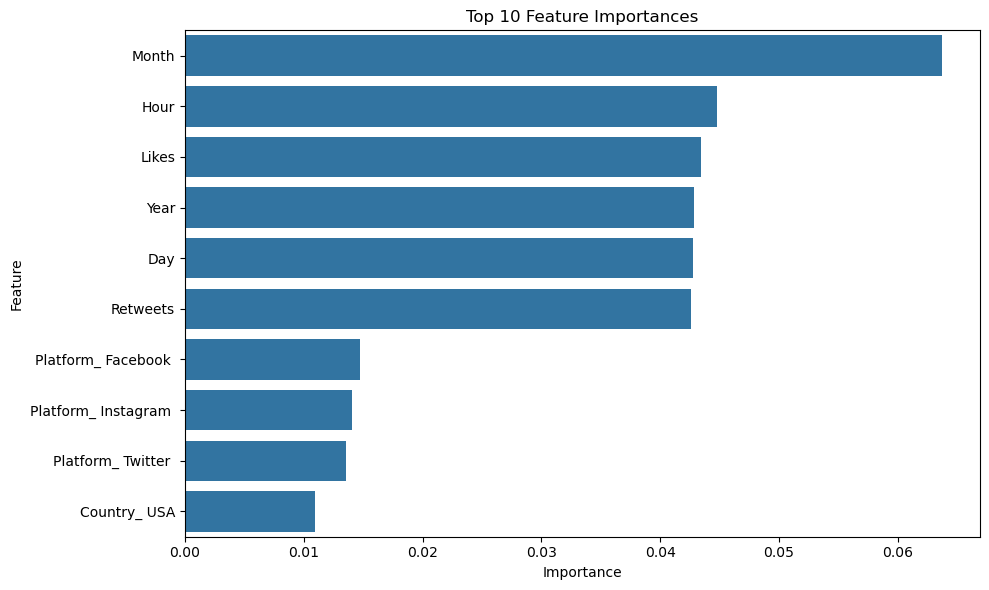

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('Sentiment.csv')
data_cleaned = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'User'])


categorical_cols = ['Platform', 'Country', 'Hashtags']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols)


le = LabelEncoder()
data_encoded['Sentiment'] = le.fit_transform(data_encoded['Sentiment'])


X = data_encoded.drop(columns=['Sentiment', 'Text'])  # Exclude text for now
y = data_encoded['Sentiment']


numeric_cols = ['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro', verbose=2)
grid_search.fit(X_train, y_train)


# Ensure the target names align with the unique labels in y
unique_labels = sorted(y.unique())
y_pred = best_rf.predict(X_test)

# Updated classification report to handle mismatched labels
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=le.inverse_transform(unique_labels)))

# Additional metrics (Precision, Recall, F1-Score for each class)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # Top 10 features
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()
